####Import necessary libraries

In [33]:
pip install squarify

In [34]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from collections import Counter
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
from PIL import Image
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors

import matplotlib
from matplotlib.colors import rgb2hex
cmap2 = matplotlib.colormaps['twilight'].resampled(20)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))

In [35]:
# Set style
sns.set(style='whitegrid')

####Load Dataset

In [36]:
#Read data from the CSV file
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv', low_memory = False)

In [37]:
#show data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
#Get more information about your data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


####Data Exploration and Analysis


In [39]:
#Missing values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

######count of data records in each column


In [40]:

df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

##### Unique values for the type of shows on Netflix

In [41]:

df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

##### Unique values for the rating

In [42]:

df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

#####Top Rated Shows

In [43]:
top_rated_shows = df[df['type'] == 'TV Show'].sort_values(by='rating', ascending=False).head(10)
print(top_rated_shows[['title', 'rating']])


                                  title    rating
7646      Oh No! It's an Alien Invasion  TV-Y7-FV
3695                   Rabbids Invasion     TV-Y7
3066                         Mia and Me     TV-Y7
3345                           The Deep     TV-Y7
3295                 Green Eggs and Ham     TV-Y7
3247          Trolls: The Beat Goes On!     TV-Y7
3246                  The Dragon Prince     TV-Y7
3148             What's New Scooby-Doo?     TV-Y7
3146  Scooby-Doo!: Mystery Incorporated     TV-Y7
3085                       Robot Trains     TV-Y7


#####Top Rated Movies

In [44]:
top_rated_shows = df[df['type'] == 'Movie'].sort_values(by='rating', ascending=False).head(10)
print(top_rated_shows[['title', 'rating']])


                                                  title    rating
8790                      You Don't Mess with the Zohan        UR
7988                                           Sex Doll        UR
7058                                      Immoral Tales        UR
7290  LEGO Ninjago: Masters of Spinjitzu: Day of the...  TV-Y7-FV
7513                          Motu Patlu: King of Kings  TV-Y7-FV
7292                                       Leo the Lion  TV-Y7-FV
7317                Little Singham aur Kaal ka Mahajaal  TV-Y7-FV
6581                                       Dear Dracula  TV-Y7-FV
7494                           Monster High: Fright On!     TV-Y7
8602                      Tom and Jerry: The Magic Ring     TV-Y7


#####Worst rated TV Shows

In [45]:
top_rated_shows = df[df['type'] == 'TV Show'].sort_values(by='rating', ascending=True).head(10)
print(top_rated_shows[['title', 'rating']])


                                    title rating
7847                         Red vs. Blue     NR
8334              The Great Train Robbery     NR
6671                             El Barco     NR
7908         Russell Peters vs. the World     NR
7597                        North & South     NR
3893  The Hateful Eight: Extended Version      R
7593                                Nobel      R
7383                             Mahi Way  TV-14
5030              Hitler's Circle of Evil  TV-14
1949                       The Good Place  TV-14


#####Worst Rated Movies

In [46]:
top_rated_shows = df[df['type'] == 'Movie'].sort_values(by='rating', ascending=True).head(10)
print(top_rated_shows[['title', 'rating']])


                                             title  rating
5813          Louis C.K.: Live at the Comedy Store  66 min
5541                               Louis C.K. 2017  74 min
5794                         Louis C.K.: Hilarious  84 min
1557                                        Canvas       G
8745           Willy Wonka & the Chocolate Factory       G
5273                        Ghost of the Mountains       G
6222                      Balto 3: Wings of Change       G
6116                         All Dogs Go to Heaven       G
6220                                         Balto       G
8594  Tinker Bell and the Legend of the NeverBeast       G


#####Content by country

In [47]:
content_by_country = df['country'].value_counts().head(10)
print(content_by_country)


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


####Data Visualization

##### Comparison between movies and tv shows

In [48]:
no_of_shows = df[df['type']=='TV Show']
no_of_movies = df[df['type']=='Movie']

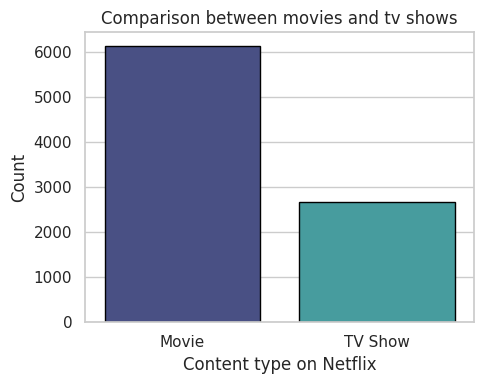

In [49]:
#plot
plt.figure(figsize = (5,4),dpi = 100)
ax = sns.countplot(x='type',data=df,linewidth=1,hue='type',palette='mako',edgecolor = 'black')
plt.xlabel("Content type on Netflix")
plt.ylabel("Count")
plt.title('Comparison between movies and tv shows')
plt.tight_layout()
plt.show()

##### Percent Distribution of movies and tv shows

In [50]:
ng_type = df['type'].value_counts().reset_index()
print(ng_type)

      type  count
0    Movie   6131
1  TV Show   2676


In [51]:
t = go.Pie(values=ng_type['count'],
           labels=ng_type['type'],
           marker=dict(colors=['LightSkyBlue','MediumPurple']),
           textfont=dict(size=18,family='Arial, sans-serif', color='black'))
layout = go.Layout(title='Percent Distribution of movies and tv shows',height=450,legend=dict(x=0.0,y=1.1))
fig = go.Figure(data=t,layout=layout)
iplot(fig)

#####Distribution of Ratings


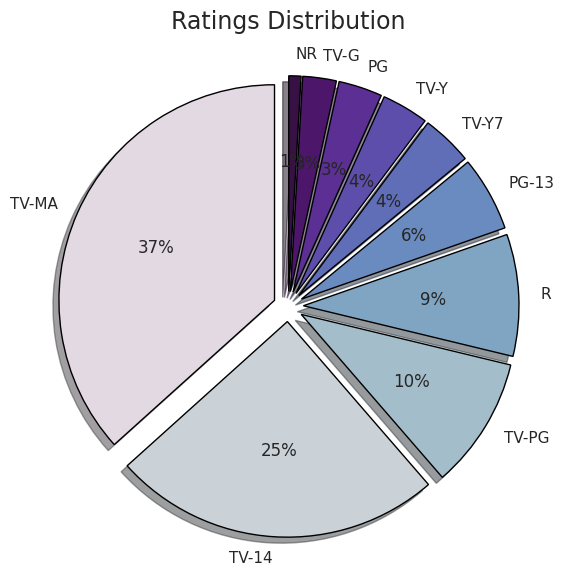

In [52]:
plt.figure(figsize = (13,7))
p_ratings = df['rating'].value_counts().head(10)
plt.pie(x = p_ratings,
        labels = p_ratings.index,
        colors = colors1,autopct = '%.0f%%',
        explode = [0.07 for i in p_ratings.index] ,
        startangle = 90,
        wedgeprops = {'linewidth':1,'edgecolor':'black'},
        shadow= True)
plt.title('Ratings Distribution',fontsize=17)
#plt.legend(loc = 'upper right',title = 'Ratings Types')
plt.show()

#####Ratings Analysis

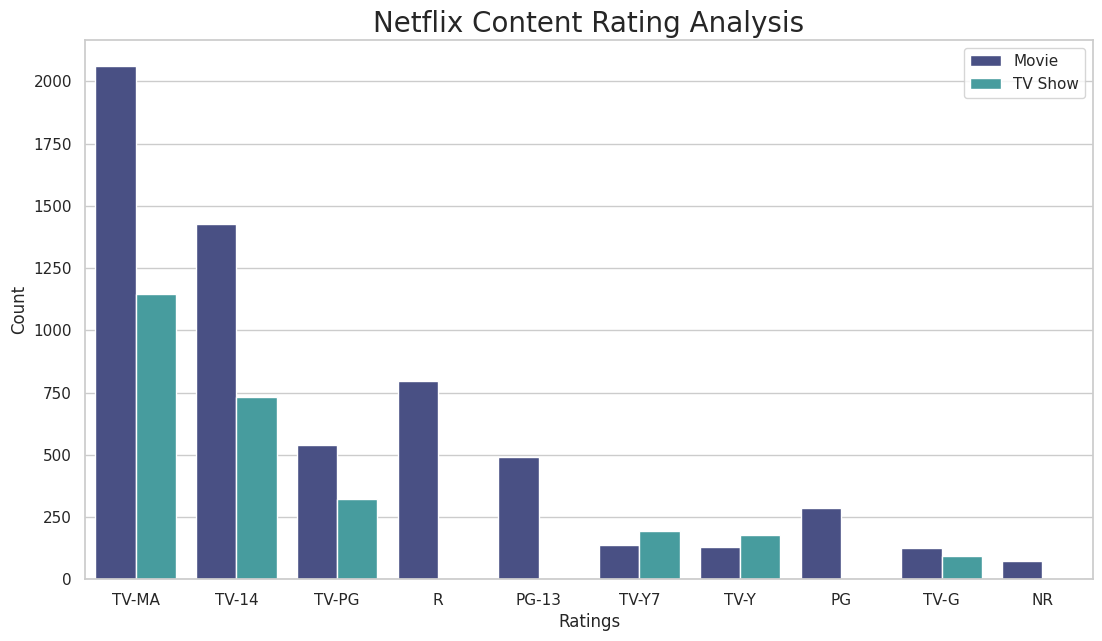

In [53]:
plt.figure(figsize =(13,7))
sns.countplot(x='rating',data=df,palette='mako',hue='type',
              order=df['rating'].value_counts().index[0:10])
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.legend()
plt.title('Netflix Content Rating Analysis',fontsize=20)
plt.show()

#####Movie Rating Analysis

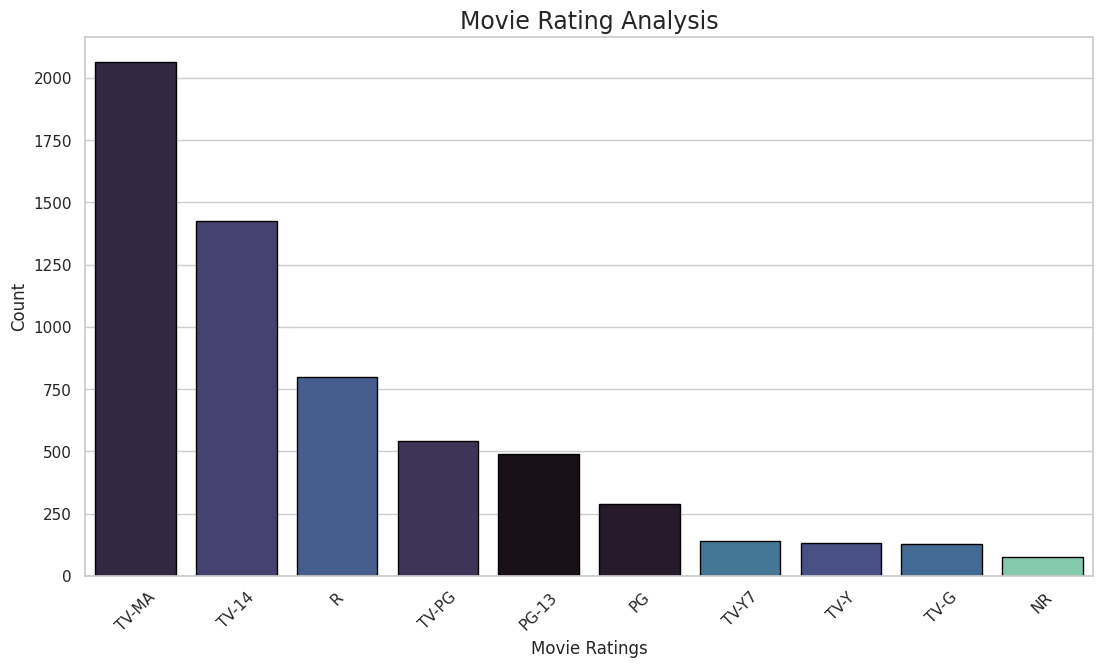

In [54]:
plt.figure(figsize =(13,7))
sns.countplot(x='rating',data=no_of_movies,palette='mako',hue='rating',
              order=no_of_movies['rating'].value_counts().index[0:10],
              edgecolor='black',legend=False)
plt.xlabel('Movie Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Movie Rating Analysis',fontsize=17)
plt.show()

#####TV Show Ratings Analysis

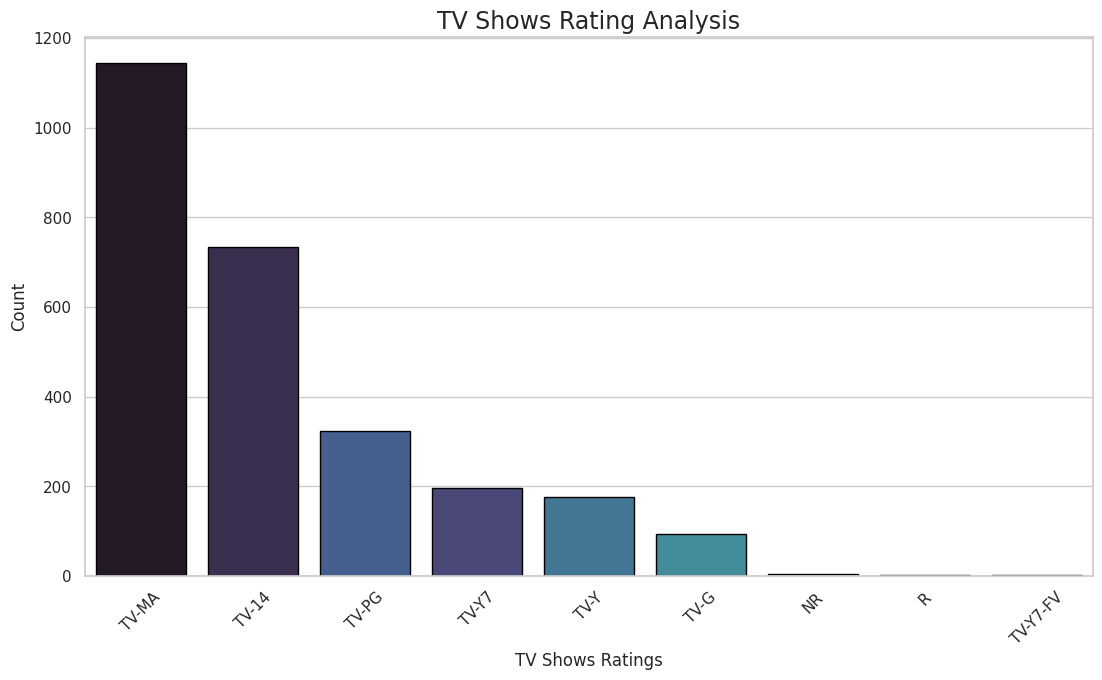

In [55]:
plt.figure(figsize =(13,7))
sns.countplot(x='rating',data=no_of_shows,palette='mako',hue='rating',
              order=no_of_shows['rating'].value_counts().index[0:10],
              edgecolor='black',legend=False)
plt.xlabel('TV Shows Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('TV Shows Rating Analysis',fontsize=17)
plt.show()

#####Movies vs TV Shows

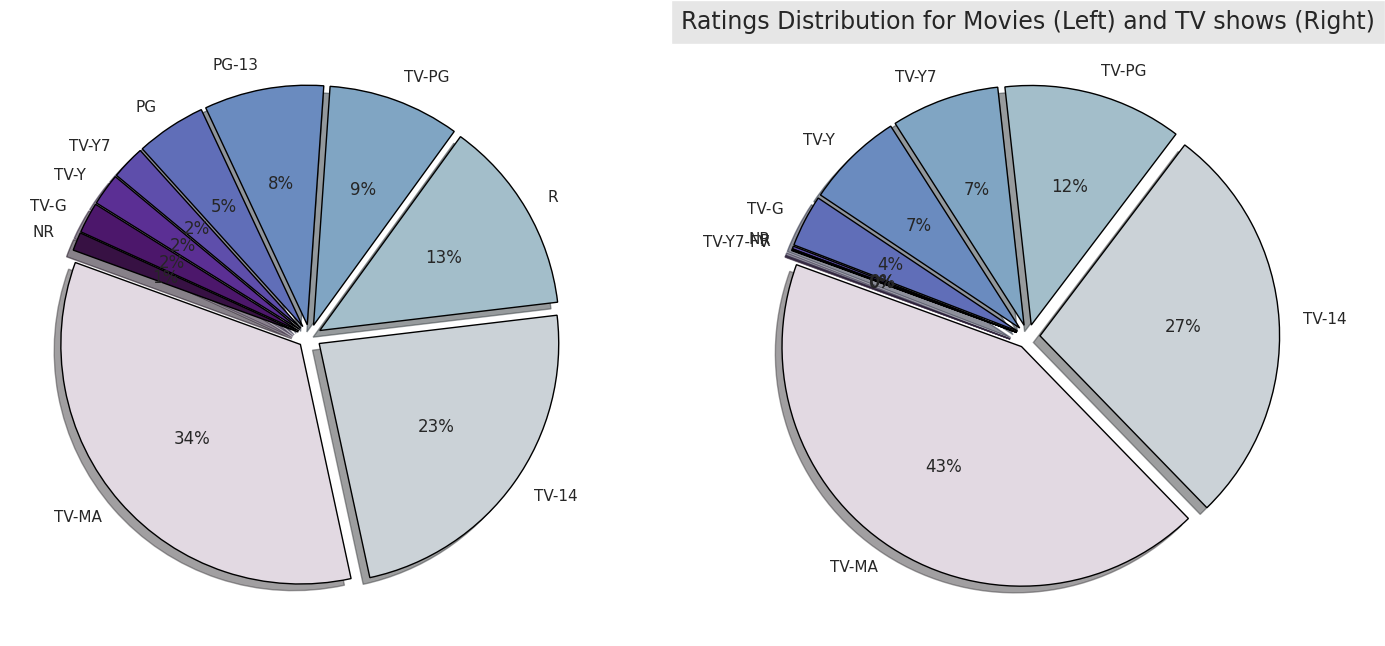

In [56]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(17,15))
np_movies = no_of_movies['rating'].value_counts().head(10)
np_shows = no_of_shows['rating'].value_counts().head(10)
plt.title('Ratings Distribution for Movies (Left) and TV shows (Right)',
          bbox={'facecolor':'0.9','pad':5},loc='center',fontsize=17)

ax0.pie(x=np_movies,
        labels=np_movies.index,
        colors=colors1,autopct='%.0f%%',
        explode=[0.05 for i in np_movies.index],
        startangle=160,wedgeprops={'linewidth':1,'edgecolor':'black'},
        shadow=True)


ax1.pie(x=np_shows,
        labels=np_shows.index,
        colors=colors1,autopct='%.0f%%',
        explode=[0.05 for i in np_shows.index],
        startangle=160,wedgeprops={'linewidth':1,'edgecolor':'black'},
        shadow=True)


plt.show()

#####Month when content can be released

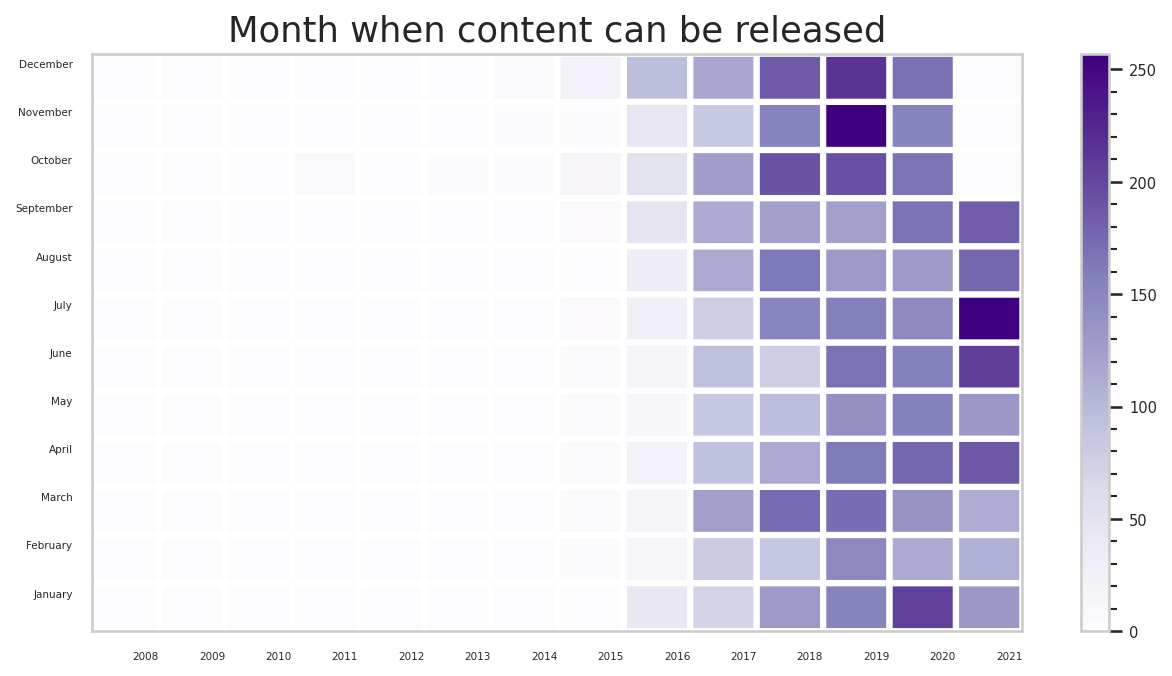

In [57]:
n_date = df[['date_added']].dropna()
n_date['year'] = n_date['date_added'].apply(lambda x: x.split(', ')[-1])
n_date['month'] = n_date['date_added'].apply(lambda x: x.strip().split(' ')[0])
month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
g_df= n_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_list].T

#plot
plt.figure(figsize=(10,5),dpi=150)
plt.pcolor(g_df,cmap='Purples',edgecolors='white',linewidths=3)
plt.xticks(np.arange(0.8,len(g_df.columns),1),g_df.columns,fontsize=5)
plt.yticks(np.arange(0.8,len(g_df.index),1),g_df.index,fontsize=5)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=7)
cbar.ax.minorticks_on()
plt.title('Month when content can be released',fontsize=17)
plt.show()

#####Top 10 Countries

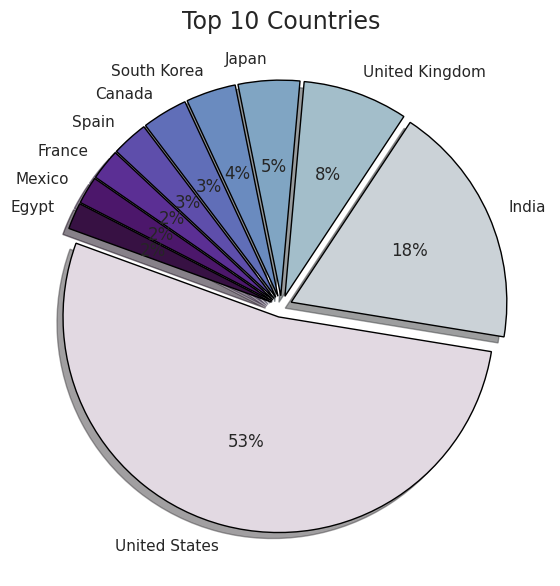

In [58]:
df['country'] = df.country.dropna()
n_countries = df.country.value_counts().head(10)

#plot
plt.figure(figsize=(10,7))
plt.pie(x = n_countries,
        labels = n_countries.index,
        colors = colors1, autopct = '%.0f%%',
        explode = [0.05 for i in n_countries.index],
        startangle = 160,wedgeprops={'linewidth':1,'edgecolor':'Black'},shadow=True)
plt.title('Top 10 Countries',fontsize=17)
plt.show()




#####which country produces the most content

In [59]:
n_country = df['country'].dropna()
nc_country = pd.Series(dict(Counter(','.join(n_country).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending= False)

#get top 15 countries
nc_country[:15]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
dtype: int64

#####plot top 15 countries

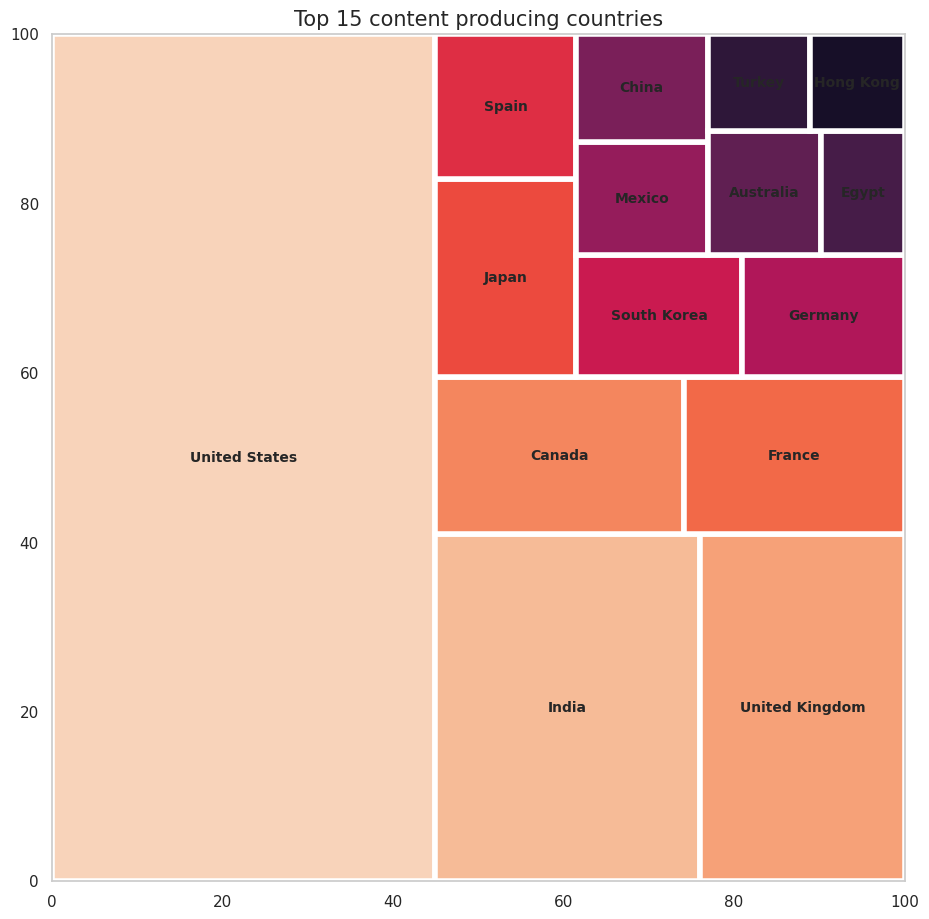

In [60]:
fig = plt.figure(figsize=(11,11))

t = nc_country[:15]
squarify.plot(sizes = t.values,label=t.index,color=sns.color_palette("rocket_r",n_colors=15),linewidth=4,text_kwargs = {'fontsize':10,'fontweight':'bold'})
plt.title("Top 15 content producing countries",fontsize=15)
plt.show()

#####Number of released movies by year

<ipython-input-61-322d54a0b998>:2: UserWarning:


The palette list has fewer values (20) than needed (73) and will cycle, which may produce an uninterpretable plot.



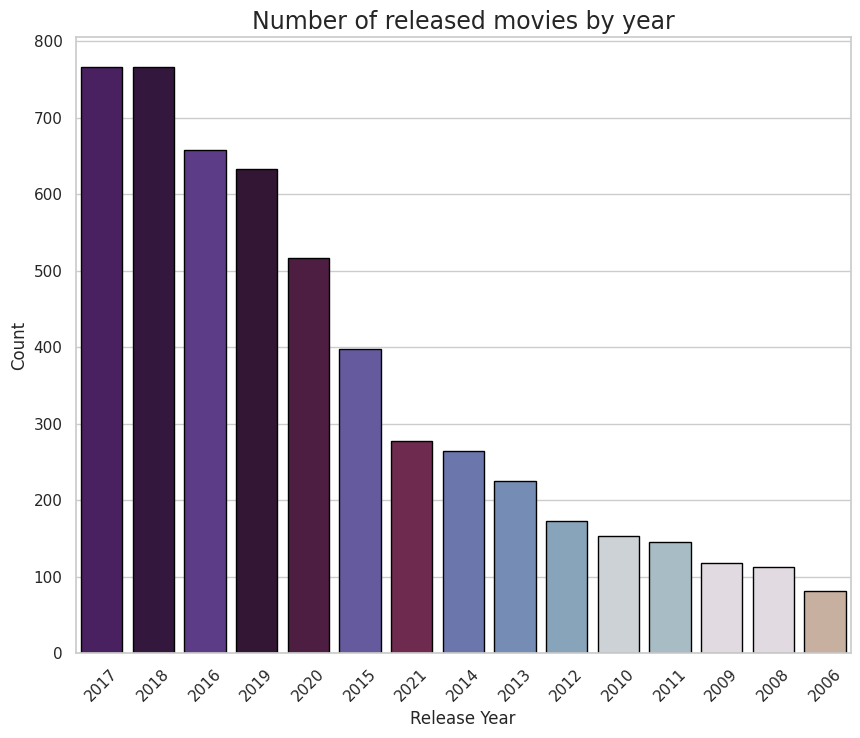

In [61]:
plt.figure(figsize=(10,8))
sns.countplot(x='release_year',data=no_of_movies,palette=colors1,hue='release_year',
              order=no_of_movies['release_year'].value_counts().index[0:15],
              edgecolor='black',legend=False)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Number of released movies by year',fontsize=17)
plt.show()

#####Number of shows released by year

<ipython-input-62-072e3a60465b>:2: UserWarning:


The palette list has fewer values (20) than needed (46) and will cycle, which may produce an uninterpretable plot.



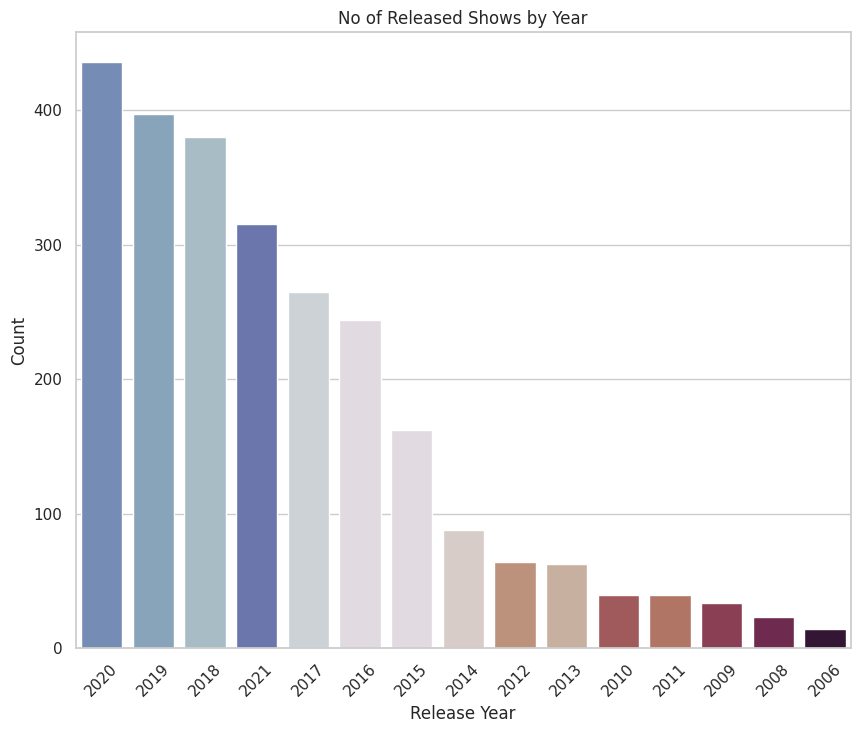

In [62]:
plt.figure(figsize=(10,8))
sns.countplot(x='release_year',data=no_of_shows,palette=colors1,
              hue='release_year',legend=False,
              order=no_of_shows['release_year'].value_counts().index[0:15])
plt.title('No of Released Shows by Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#####Word cloud for Titles

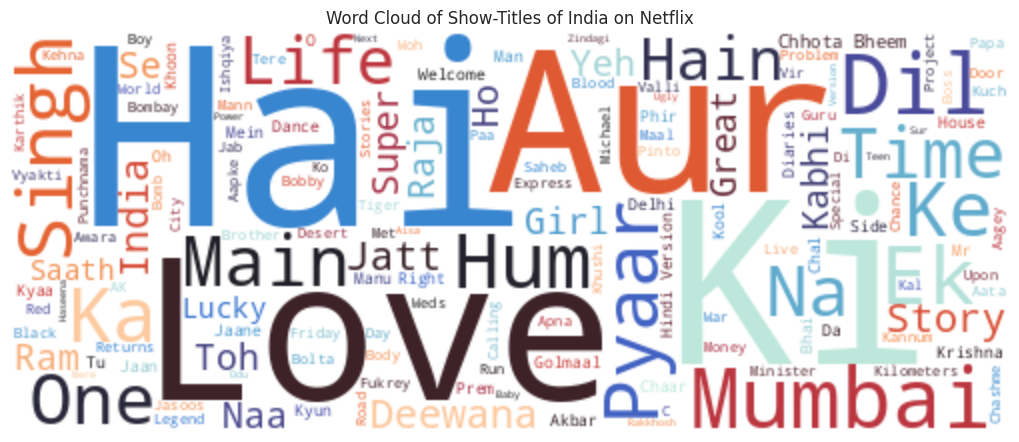

In [63]:
n_title = df[df['country']=='India'].dropna()
#print(n_title['title'])
t = str(list(n_title['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
wc = WordCloud(background_color = 'white', width = 500,  height = 200,colormap='icefire', max_words = 150).generate(t)
plt.figure( figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Word Cloud of Show-Titles of India on Netflix')
plt.show()